In [81]:

# Import Required Libraries. Including Pandas if not already installed
import pandas as pd

# Load the 'tested_worldwide.csv' file from the root level
df = pd.read_csv('tested_worldwide.csv')

# Display the first few rows of the dataframe
df.head()

,Date,Country_Region,Province_State,positive,active,hospitalized,hospitalizedCurr,recovered,death,total_tested,daily_tested,daily_positive
0,2020-01-16,Iceland,All States,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-17,Iceland,All States,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2020-01-18,Iceland,All States,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,2020-01-20,South Korea,All States,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
4,2020-01-22,United States,All States,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [82]:
# display first 5 rows of dataset.
df.head()
# Display the number of rows and columns and print out with a message  
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

# Display the data types of each column .
print(df.dtypes)
# Display the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)
# Display the number of unique values in each column and print out with a message
unique_values = df.nunique()
print(unique_values)


The dataset has 27641 rows and 12 columns
Date                 object
Country_Region       object
Province_State       object
positive            float64
active              float64
hospitalized        float64
hospitalizedCurr    float64
recovered           float64
death               float64
total_tested        float64
daily_tested        float64
daily_positive      float64
dtype: object
Date                    0
Country_Region          0
Province_State          0
positive             4242
active               9833
hospitalized        19231
hospitalizedCurr    13080
recovered            9626
death                4010
total_tested          912
daily_tested         1174
daily_positive       4557
dtype: int64
Date                  297
Country_Region        147
Province_State         81
positive            14998
active               9554
hospitalized         4862
hospitalizedCurr     2904
recovered            9183
death                5641
total_tested        23610
daily_tested        133

In [83]:
# Drop the columns that are not needed for the analysis.
data = df[['Country_Region', 'positive', 'total_tested']]

In [84]:
# Rename the columns to make them more readable
data.rename(columns={'Country_Region': 'Country', 'positive': 'Positive Cases', 'total_tested': 'Total Tested'}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12400\3923634081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Country_Region': 'Country', 'positive': 'Positive Cases', 'total_tested': 'Total Tested'}, inplace=True)


In [85]:
 #Drop the rows that have missing values
data.dropna(inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12400\4043645718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [86]:
#Convert the data types of the columns to the appropriate types, include country column
data['Positive Cases'] = data['Positive Cases'].astype(int)
data['Total Tested'] = data['Total Tested'].astype(int)
data['Country'] = data['Country'].astype('category')


C:\Users\Admin\AppData\Local\Temp\ipykernel_12400\2405854316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Positive Cases'] = data['Positive Cases'].astype(int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12400\2405854316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Tested'] = data['Total Tested'].astype(int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12400\2405854316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [87]:
#Display the number of missing values in each column and print out with a message
missing_values = data.isnull().sum()
print(missing_values)

Country           0
Positive Cases    0
Total Tested      0
dtype: int64


In [88]:
# Create a new dataframe that contains the total number of positive cases for each country
total_positive_cases = data.groupby('Country')['Positive Cases'].sum().reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12400\509779994.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_positive_cases = data.groupby('Country')['Positive Cases'].sum().reset_index()


In [89]:
# Group the data by 'Country' and calculate the sum of 'Positive Cases'

total_positive_cases = data.groupby('Country')['Positive Cases'].sum()

# Create a new dataframe with the total positive cases for each country

df_total_positive_cases = pd.DataFrame({'Country': total_positive_cases.index, 'Total Positive Cases': total_positive_cases.values})

# Display the new dataframe and print it out with a message
df_total_positive_cases



C:\Users\Admin\AppData\Local\Temp\ipykernel_12400\789902345.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_positive_cases = data.groupby('Country')['Positive Cases'].sum()


,Country,Total Positive Cases
0,Albania,12279
1,Argentina,28220
2,Armenia,7225809
3,Australia,20654
4,Austria,541013
...,...,...
112,United States,1837768204
113,Uruguay,2160
114,Veneto,119910
115,Venezuela,461


In [90]:
# Sort the dataframe in descending order of the total number of positive cases
df_total_positive_cases.sort_values(by='Total Positive Cases', ascending=False, inplace=True)

In [91]:
# Display the top ten countries with the most positive cases and print out with a message
top_ten_positive_cases = df_total_positive_cases.head(10)
print(top_ten_positive_cases)

            Country  Total Positive Cases
112   United States            1837768204
48            Italy              64199206
17           Canada              50960416
7        Bangladesh              43771939
106          Turkey              16556127
26          Czechia              10822251
88           Russia              10663267
2           Armenia               7225809
21       Costa Rica               6655702
111  United Kingdom               4924956


In [92]:
# Create a new dataframe that contains the total number of tests conducted for each country
total_tests = data.groupby('Country')['Total Tested'].sum()

# Create a new dataframe with the total tests conducted for each country
df_total_tests = pd.DataFrame({'Country': total_tests.index, 'Total Tests': total_tests.values})

# Display the new dataframe
df_total_tests

C:\Users\Admin\AppData\Local\Temp\ipykernel_12400\3527117691.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_tests = data.groupby('Country')['Total Tested'].sum()


,Country,Total Tests
0,Albania,114611
1,Argentina,323035
2,Armenia,35667650
3,Australia,323233309
4,Austria,7610548
...,...,...
112,United States,23592177772
113,Uruguay,51789
114,Veneto,1650118
115,Venezuela,395904


In [93]:
# Sort the dataframe in descending order of the total number of tests conducted
df_total_tests.sort_values(by='Total Tests', ascending=False, inplace=True)

In [95]:
# Display the top ten countries with the most tests conducted and print out with a message
top_ten_tests = df_total_tests.head(10)
print(top_ten_tests)

           Country  Total Tests
112  United States  23592177772
17          Canada   1797986542
48           Italy   1547472209
47          Israel    388197039
3        Australia    323233309
88          Russia    300300499
7       Bangladesh    233149800
106         Turkey    228325949
26         Czechia    180065598
39          Greece    142101237


In [97]:
# Merge the two dataframes created in the previous steps
merged_data = pd.merge(df_total_positive_cases, df_total_tests, on='Country')
merged_data

,Country,Total Positive Cases,Total Tests
0,United States,1837768204,23592177772
1,Italy,64199206,1547472209
2,Canada,50960416,1797986542
3,Bangladesh,43771939,233149800
4,Turkey,16556127,228325949
...,...,...,...
112,Mozambique,160,5287
113,Myanmar,151,8460
114,Malawi,78,1689
115,Grenada,42,322


In [98]:
# Create a new column that contains the ratio of positive cases to the number of tests conducted
merged_data['Positive Test Ratio'] = merged_data['Total Positive Cases'] / merged_data['Total Tests']

In [99]:
# Sort the dataframe in descending order of the ratio of positive cases to the number of tests conducted
merged_data.sort_values(by='Positive Test Ratio', ascending=False, inplace=True)

In [103]:
#Display the top three countries with the highest ratio of positive cases to the number of tests conducted
top_countries = merged_data.nlargest(3, 'Positive Test Ratio')

top_countries[['Country', 'Positive Test Ratio']]

,Country,Positive Test Ratio
106,Tanzania,0.780675
103,Burkina Faso,0.480870
50,Ecuador,0.322330


<Axes: xlabel='Country'>

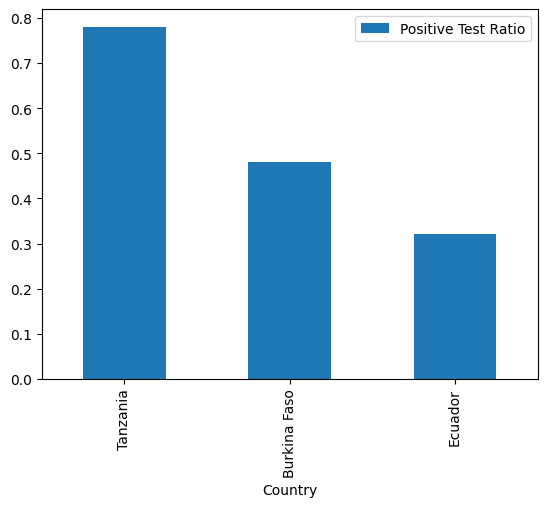

In [105]:
# Display the results a chart that shows the top three countries with the highest ratio of positive cases to the number
# of tests conducted
import matplotlib.pyplot as plt
top_countries.plot(x='Country', y='Positive Test Ratio', kind='bar')


<Axes: xlabel='Country'>

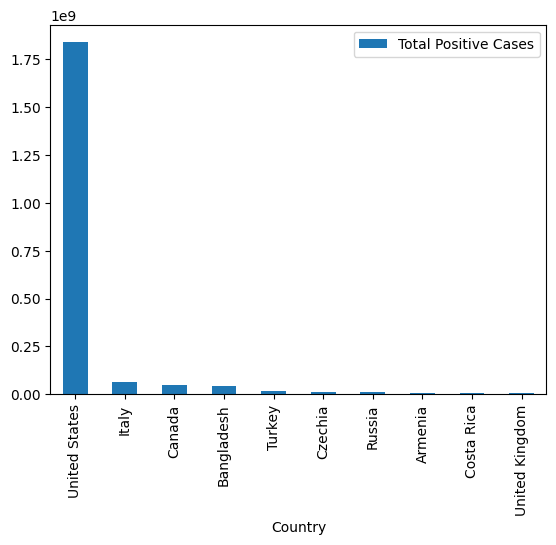

In [106]:
# Display the results in a chart that shows the top ten countries with the most positive cases
top_ten_positive_cases.plot(x='Country', y='Total Positive Cases', kind='bar')


In [115]:
# Display the results in a chart that shows the top ten countries with the most tests conducted
#get the top 10 countries with the most tests conducted
top_ten_tests = df_total_tests.head(10)
#create a horizontal bar chart
plt.barh(top_ten_tests['Country'], top_ten_tests['Total Tests'])
#add title and labels
plt.title('Top Ten Countries with the total tests conducted')
plt.xlabel('Country')
plt.ylabel('Total Positive Cases')
#invert the y-axis to have the country with the most positive cases at the top
plt.gca().invert_yaxis()
#display the plot
plt.show()

AttributeError: 'DataFrame' object has no attribute 'barh'